## Importing
***

Import required **libraries**:
1.  pandas and numpy for working with data.
2.  matplotlib and seaborn for data visualization.
3.  sklearn for data scaling, machine learning and other data analytics procedures. (Only required modules imported at necessary steps of the segmentation process.)

Import the transactional **data** of customers collected, which is required for the analysis.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [8]:
baskets = pd.read_csv("./baskets_sample.csv")
cat_spends = pd.read_csv("./category_spends_sample.csv")
customers = pd.read_csv("./customers_sample.csv")
lineitems = pd.read_csv("./lineitems_sample.csv")

## Check shape and features
***

Have a look at the features in the data, types of the features, the numbers rows of data.

In [9]:
print("Shape of baskets DF: ", baskets.shape)
print("Shape of categorical_spends DF: ", cat_spends.shape)
print("Shape of customers DF: ", customers.shape)
print("Shape of lineitems DF: ", lineitems.shape)

Shape of baskets DF:  (195547, 5)
Shape of categorical_spends DF:  (3000, 21)
Shape of customers DF:  (3000, 6)
Shape of lineitems DF:  (1461315, 6)


In [4]:
baskets.head(5)

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1


In [5]:
cat_spends.head(5)

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,£64.58,£35.91,£107.78,£27.08,£29.59,£0.00,£54.83,£6.35,£22.83,...,£28.62,£162.10,£28.02,£28.12,£28.54,£2.00,£15.00,£7.48,£0.00,£0.84
1,8171,£16.89,£37.24,£28.84,£33.43,£66.40,£0.00,£22.06,£12.09,£2.34,...,£26.44,£0.00,£8.42,£2.65,£3.76,£0.00,£0.00,£9.99,£0.00,£0.00
2,1060,£87.30,£82.98,£49.88,£20.57,£37.04,£0.00,£9.85,£57.98,£31.12,...,£54.65,£0.00,£0.00,£2.60,£0.00,£18.00,£20.00,£106.46,£0.00,£0.00
3,3728,£84.05,£186.56,£175.50,£119.84,£111.08,£0.00,£13.05,£25.54,£124.42,...,£0.95,£127.70,£0.00,£0.00,£0.00,£4.00,£0.00,£0.00,£0.00,£4.50
4,14621,£35.16,£121.31,£79.23,£29.03,£37.17,£0.00,£40.06,£0.00,£4.68,...,£36.24,£0.00,£2.55,£99.16,£0.00,£0.00,£0.00,£3.40,£0.00,£0.00


In [6]:
customers.head(5)

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,4749,220,260,1.181818,£631.12,£2.87
1,4757,248,333,1.342742,£452.42,£1.82
2,144,226,303,1.340708,£261.16,£1.16
3,572,285,346,1.214035,£638.79,£2.24
4,669,285,324,1.136842,£561.42,£1.97


In [7]:
lineitems.head(5)

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,£1.39
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,£4.25
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,£0.50
3,2649,2007-03-12 16:05:00,34890,BAKERY,1,£0.57
4,859,2007-03-10 09:53:00,613984,BAKERY,1,£1.59


## Exploratory Data Analysis
***

1. Check data types and convert to appropriate types (as seen from head, features that indicate spend are in string format with a currency symbol).
2. Describe the dataframes to check basic stats.
3. Check for missing values if any and update it accordingly.
4. Engineer new features
5. Check if any features are highly correlated.
6. Check if distributions of feature values are skewed.


### Convert to appropriate data type
Convert features to appropriate data types and also calculate any new features that could help further analysis

In [10]:
#The below is a function to convert strings with pound symbol to float values.
def convertCurrencyColumnsToNumeric(dataFrame,currencySymbol="£"):
    string_dtypes = dataFrame.convert_dtypes().select_dtypes("string")
    currncy_columns = [col for col in string_dtypes if string_dtypes[col].str.contains(currencySymbol).any()]
    dataFrame[currncy_columns] = pd.DataFrame({col: [float(x.replace(currencySymbol,'').replace(',','')) for x in dataFrame[col]] for col in dataFrame[currncy_columns]})

In [11]:
#For convenience, converting all the columns with pound symbol to float values in one block.
convertCurrencyColumnsToNumeric(customers)
convertCurrencyColumnsToNumeric(baskets)
convertCurrencyColumnsToNumeric(cat_spends)
convertCurrencyColumnsToNumeric(lineitems)

In [12]:
#Define a function that converts string in date format to datetime type
DATETIME_FORMAT = "%Y-%m-%d %H:%M:%S"

def convertStringToDateTime(dataframe, feature):
    dataframe[feature] = dataframe[feature].apply(lambda x: datetime.strptime(x, DATETIME_FORMAT))

In [13]:
#Convert the purchase_time feature in baskets to calculate recency.
convertStringToDateTime(baskets, 'purchase_time')

baskets.head(5)

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1


### Describing the data frames

Describe the dataframes to check the main statistics of the data.


In [12]:
#Describe the customers dataframe
print(customers.describe())

       customer_number      baskets  total_quantity  average_quantity  \
count      3000.000000  3000.000000     3000.000000       3000.000000   
mean       8095.724333   487.105000      583.722000          1.204499   
std        4686.259488   332.824524      405.006359          0.136323   
min          14.000000     6.000000        6.000000          1.000000   
25%        4044.750000   257.000000      307.750000          1.119625   
50%        8218.500000   417.000000      495.000000          1.175889   
75%       12115.500000   628.250000      744.250000          1.250430   
max       16316.000000  3119.000000     4949.000000          2.503686   

       total_spend  average_spend  
count  3000.000000    3000.000000  
mean    769.412937       1.682477  
std     552.769022       0.733105  
min       7.280000       0.620000  
25%     406.120000       1.260000  
50%     627.170000       1.490000  
75%     957.675000       1.860000  
max    6588.650000      10.840000  


In [13]:
#Describe the lineitems dataframe
print(lineitems.describe())

       customer_number    product_id      quantity         spend
count     1.461315e+06  1.461315e+06  1.461315e+06  1.461315e+06
mean      7.748199e+03  3.940964e+05  1.198349e+00  1.579563e+00
std       4.405076e+03  2.989743e+05  5.990824e-01  2.576834e+00
min       1.400000e+01  2.200000e+01 -1.300000e+01 -1.000000e+02
25%       4.028000e+03  6.027800e+04  1.000000e+00  6.800000e-01
50%       7.823000e+03  5.612280e+05  1.000000e+00  1.030000e+00
75%       1.121100e+04  6.953890e+05  1.000000e+00  1.730000e+00
max       1.631600e+04  7.450580e+05  1.000000e+02  3.600000e+02


In [14]:
#Describe the baskets dataframe
print(baskets.describe())

       customer_number  basket_quantity   basket_spend  basket_categories
count    195547.000000    195547.000000  195547.000000      195547.000000
mean       7896.492899         8.955218      11.804010           4.231990
std        4408.251411         9.510890      13.031542           2.478016
min          14.000000       -11.000000     -98.400000           1.000000
25%        4323.000000         3.000000       4.280000           2.000000
50%        7944.000000         6.000000       8.130000           4.000000
75%       11324.000000        11.000000      14.480000           6.000000
max       16316.000000       190.000000     377.280000          16.000000


### Checking missing values and imputing

The Bakery feature in cat_spends dataframe has no value but there are entries for the category in lineitems dataframe. So impute the values from lineitems into cat_spends. But there are negative values of spends as well. This will considered as positive spends and the whole categorical spends will be recalcualted later in Feature engineering.

In [15]:
cat_spends.head(5)

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,64.58,35.91,107.78,27.08,29.59,0.0,54.83,6.35,22.83,...,28.62,162.1,28.02,28.12,28.54,2.0,15.0,7.48,0.0,0.84
1,8171,16.89,37.24,28.84,33.43,66.40,0.0,22.06,12.09,2.34,...,26.44,0.0,8.42,2.65,3.76,0.0,0.0,9.99,0.0,0.00
2,1060,87.30,82.98,49.88,20.57,37.04,0.0,9.85,57.98,31.12,...,54.65,0.0,0.00,2.60,0.00,18.0,20.0,106.46,0.0,0.00
3,3728,84.05,186.56,175.50,119.84,111.08,0.0,13.05,25.54,124.42,...,0.95,127.7,0.00,0.00,0.00,4.0,0.0,0.00,0.0,4.50
4,14621,35.16,121.31,79.23,29.03,37.17,0.0,40.06,0.00,4.68,...,36.24,0.0,2.55,99.16,0.00,0.0,0.0,3.40,0.0,0.00


In [16]:
#Check for other NA values
print(customers.isna().sum())
print(cat_spends.isna().sum())

customer_number     0
baskets             0
total_quantity      0
average_quantity    0
total_spend         0
average_spend       0
dtype: int64
customer_number         0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
bakery                  0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
cashpoint               0
seasonal_gifting        0
discount_bakery         0
practical_items         0
dtype: int64


### Feature engineering


In [14]:
#Recalculate quantity and spends using absolute values
total_quantity = lineitems.groupby(by='customer_number')['quantity'].agg(lambda x : abs(x).sum()).reset_index().rename(columns={'quantity':'total_quantity'})
total_spend = lineitems.groupby(by='customer_number')['spend'].agg(lambda x : abs(x).sum()).reset_index().rename(columns={'spend':'total_spend'})

#Calculate number of visits from baskets table to help calculate average quantity and spends later
no_of_visits = baskets.customer_number.value_counts()
no_of_visits.index.names = ['customer_number']
no_of_visits = no_of_visits.to_frame(name="frequency")

In [15]:
#Merge the dataframes created above
from functools import reduce

new_column_dataframes = [total_quantity,total_spend,no_of_visits]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['customer_number']), new_column_dataframes)

df_merged.head()

,customer_number,total_quantity,total_spend,frequency
0,14,531,675.72,56
1,45,655,585.73,33
2,52,294,222.18,59
3,61,499,547.87,37
4,63,281,293.34,48


In [16]:
#Calculate average quantity and spends
df_merged['avg_quantity_per_visit'] = df_merged['total_quantity']/df_merged['frequency']
df_merged['avg_spend_per_visit'] = df_merged['total_spend']/df_merged['frequency']
df_merged['avg_spend_per_item'] = df_merged['total_spend']/df_merged['total_quantity']

In [20]:
df_merged.head()

,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item
0,14,531,675.72,56,9.482143,12.066429,1.272542
1,45,655,585.73,33,19.848485,17.749394,0.894244
2,52,294,222.18,59,4.983051,3.765763,0.755714
3,61,499,547.87,37,13.486486,14.807297,1.097936
4,63,281,293.34,48,5.854167,6.111250,1.043915


In [17]:
#Extract max date from table and calculate recency
MAX_DATE = datetime.strptime("2007-09-01 21:55:00", DATETIME_FORMAT)
def calculateOffsetDays(series):
    return series.apply(lambda x: (MAX_DATE - x).days)

In [18]:
baskets['recency'] = calculateOffsetDays(baskets.purchase_time)

In [19]:
recency_per_customer = baskets.groupby(by='customer_number')['recency'].min()

for cust_number in recency_per_customer.keys():
    df_merged.loc[df_merged['customer_number'] == cust_number,'recency']= int(recency_per_customer[cust_number])

In [20]:
df_merged.head()

,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency
0,14,531,675.72,56,9.482143,12.066429,1.272542,2.0
1,45,655,585.73,33,19.848485,17.749394,0.894244,2.0
2,52,294,222.18,59,4.983051,3.765763,0.755714,3.0
3,61,499,547.87,37,13.486486,14.807297,1.097936,4.0
4,63,281,293.34,48,5.854167,6.111250,1.043915,8.0


In [21]:
#Finally recalculate categorical spends with absolute values
lineitems['abs_spend'] = lineitems['spend'].abs()
cat_spends_new = lineitems.groupby(['customer_number','category'])['abs_spend'].sum().unstack('category', fill_value=0).add_prefix('SPEND_')
cat_spends_new = cat_spends_new.reset_index()

cat_spends_new.head()

category,customer_number,SPEND_BAKERY,SPEND_CASHPOINT,SPEND_CONFECTIONARY,SPEND_DAIRY,SPEND_DELI,SPEND_DISCOUNT_BAKERY,SPEND_DRINKS,SPEND_FROZEN,SPEND_FRUIT_VEG,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
0,14,18.09,0.0,23.22,172.58,0.00,1.25,113.45,25.29,11.10,...,11.28,0.0,182.37,6.40,0.00,23.36,5.07,5.31,0.0,20.90
1,45,18.00,0.0,106.54,142.16,2.00,0.00,0.00,7.05,30.21,...,24.31,0.0,60.31,17.49,0.00,56.51,0.00,29.65,0.0,8.08
2,52,2.45,10.0,3.29,5.19,49.07,0.00,0.00,1.78,53.29,...,12.11,1.0,9.74,3.12,0.00,2.78,23.20,8.98,0.0,35.10
3,61,32.75,0.0,46.39,55.29,19.88,0.00,20.65,18.63,70.18,...,45.71,6.0,121.38,5.55,2.87,12.12,3.04,14.87,0.0,16.38
4,63,33.35,0.0,73.07,42.11,32.14,0.00,0.00,14.53,22.01,...,25.08,3.0,3.46,2.00,0.00,13.38,0.00,1.67,0.0,14.00


In [22]:
#Create the final dataframe to be used for analysis
df_merged = pd.merge(df_merged,cat_spends_new,on=['customer_number'])

In [23]:
df_merged.describe()

,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,SPEND_CASHPOINT,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,584.378000,772.818430,65.182333,11.281044,14.846810,1.398965,9.120333,38.210123,45.330583,...,60.917053,17.523903,54.741353,16.653390,2.016220,35.48057,6.126987,23.315137,92.547613,8.554260
std,4686.259488,405.494055,555.915353,47.464717,8.536080,11.169727,0.569299,20.938847,36.496115,123.584361,...,69.805924,60.561332,67.801954,26.377091,4.322232,41.24047,13.104271,35.720307,201.703812,14.757745
min,14.000000,6.000000,7.280000,1.000000,1.200000,1.456000,0.558163,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4044.750000,307.750000,407.020000,32.000000,6.137631,8.070885,1.074132,1.000000,14.635000,0.000000,...,18.145000,0.000000,12.640000,1.500000,0.000000,8.70000,0.000000,3.757500,0.000000,0.890000
50%,8218.500000,495.000000,628.250000,53.000000,8.736753,11.850761,1.253455,3.000000,29.270000,0.000000,...,39.075000,0.000000,32.930000,7.345000,0.000000,23.09500,1.990000,11.685000,2.030000,3.760000
75%,12115.500000,745.000000,961.807500,86.000000,13.394643,17.469854,1.536898,7.000000,50.050000,30.000000,...,77.250000,7.000000,72.380000,19.687500,2.510000,47.33000,6.720000,28.782500,81.030000,10.647500
max,16316.000000,4949.000000,6588.650000,374.000000,90.750000,152.621667,7.919243,165.000000,444.370000,2137.010000,...,884.450000,946.000000,713.280000,351.730000,65.060000,454.29000,229.440000,529.650000,2488.940000,321.490000


### Check for correlation

Check for correlation between features

Text(0.5, 68.09375, 'Features correlations')

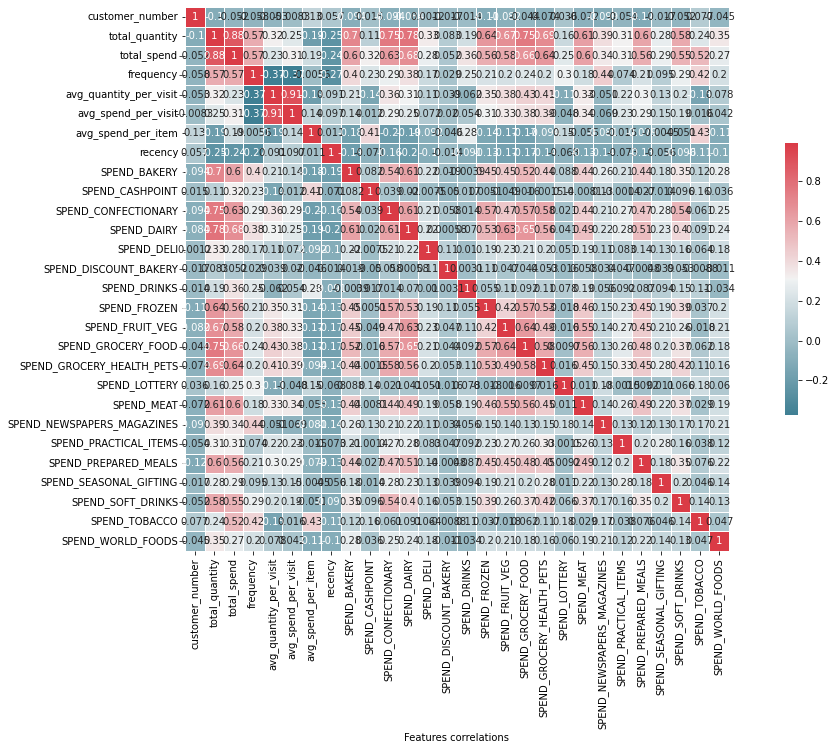

In [27]:
corr = df_merged.corr()

fig, ax= plt.subplots(figsize=(20, 10))

#-- Generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#-- Generate the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.99, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot= True)
plt.xlabel('Features correlations')

There are correlated features which will be handled by dimensionality reduction techniques later.

### Check if distributions are skewed

Check if distributions are skewed and apply log tranform if required.

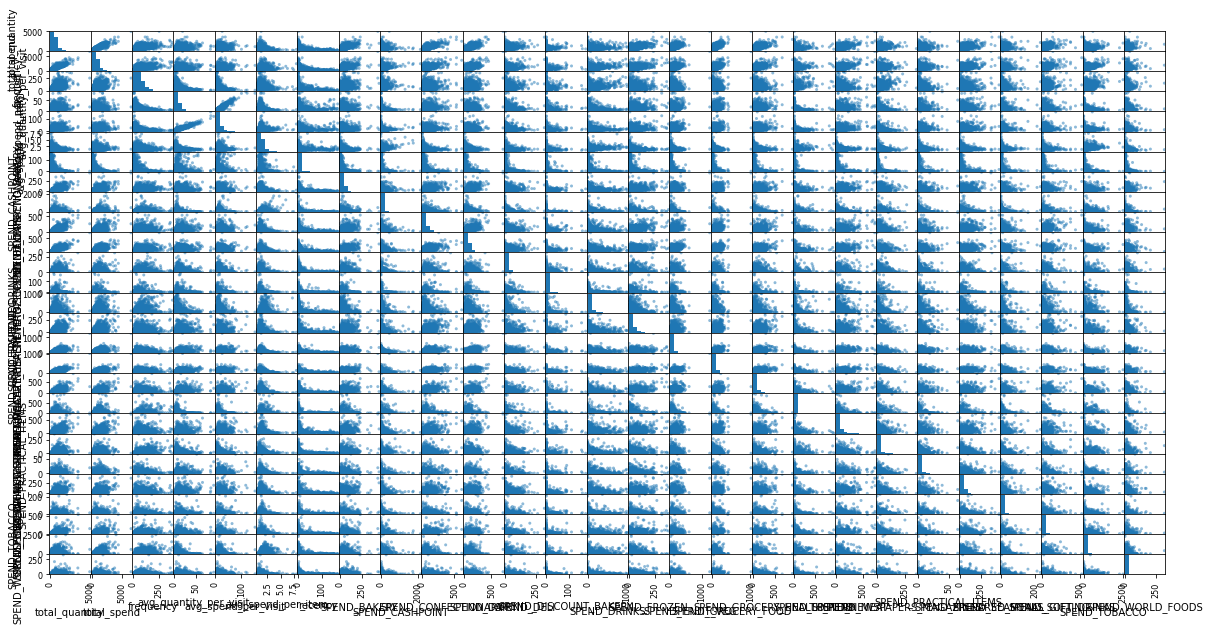

In [28]:
scatter = pd.plotting.scatter_matrix(df_merged.drop(columns=['customer_number']), figsize = (20,10))

Most the of distributions are right skewed, so it is better to apply a transformation

## Data Manipulation
***

1.   Transformation to fix right skewenes which is important for KMeans clustering as it assumes data is normally distributed.
2.   Scale the data to avoid over emphasising high value features.
3.   Apply dimensionality reduction technique to reduce features into 3 dimensions.




In [29]:
#Drop customer_number before clustering
join_df = df_merged.drop(columns=['customer_number'])

In [30]:
#Import power transformer and apply the transformation to data
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(standardize=False)
scaled_data = transformer.fit_transform(join_df)

join_df = pd.DataFrame(scaled_data, index=join_df.index, columns=join_df.columns)


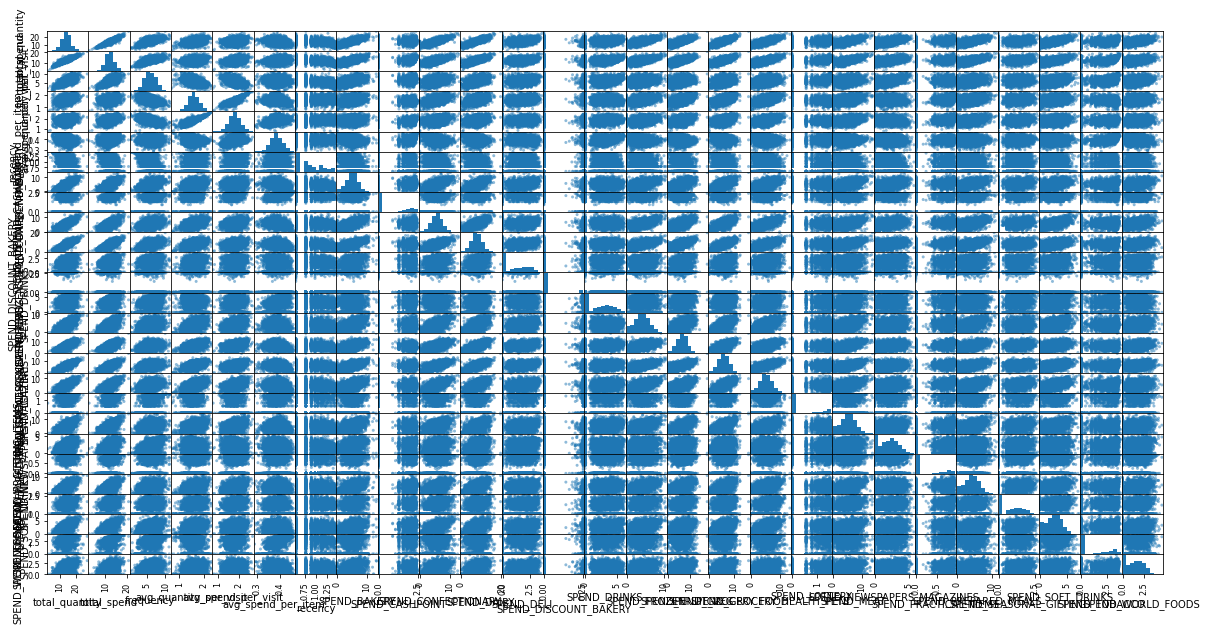

In [33]:
#Check for skewness again
scatter = pd.plotting.scatter_matrix(join_df, figsize = (20,10))

All the distributions are normal. Next Apply scaling. Choose MinMaxScaler so that the data remains positive which is required for the NMF dimensionality reduction technique.

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(join_df)

join_df = pd.DataFrame(scaled_data, index=join_df.index, columns=join_df.columns)


In [36]:
join_df.shape

(3000, 27)

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


   total_quantity  total_spend  frequency  avg_quantity_per_visit  \
0        4.281733     5.729338   5.412353                4.137556   
1        1.290699     1.536717   2.851921                0.000000   
2        0.740986     1.185686   0.018460                4.203421   
3        0.610006     0.574706   0.227115                0.663548   
4        0.409724     0.421441   0.482951                0.462581   
5        0.454360     0.715420   0.985456                0.000000   
6        1.949925     1.802093   1.806250                2.104704   

   avg_spend_per_visit  avg_spend_per_item    recency  SPEND_BAKERY  \
0             5.470472            8.149991   0.000000      2.358679   
1             0.036897            1.825859   0.000000      1.014539   
2             4.240505            3.863040  10.509138      0.364166   
3             0.585158            0.117101   0.000000      0.515430   
4             0.407872            0.393155   0.000000      0.247629   
5             0.32107

<AxesSubplot:>

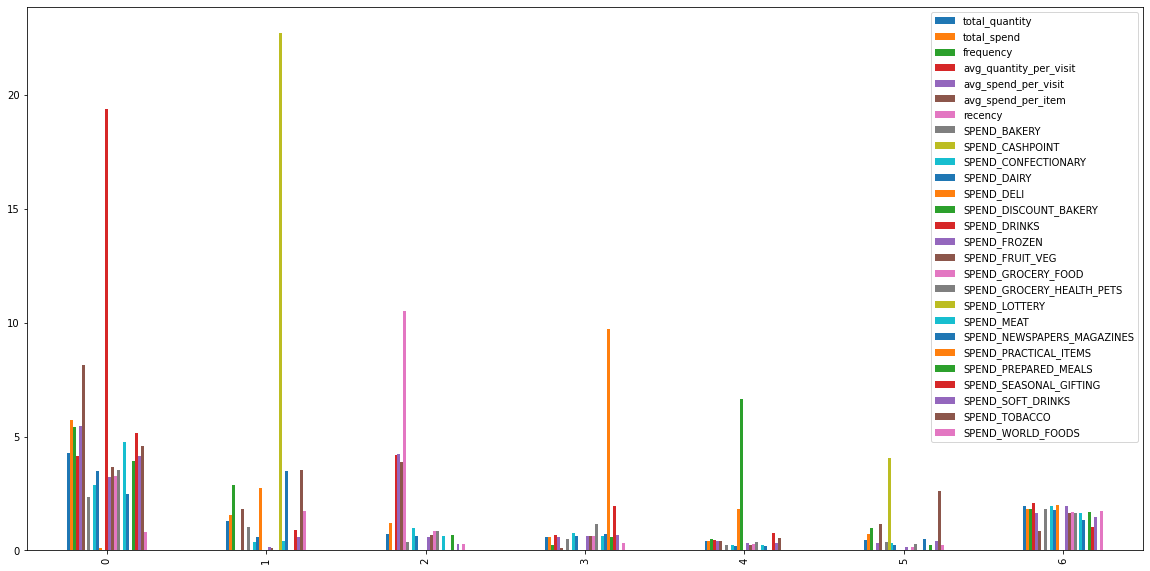

In [39]:
#-- Apply NMF by fitting the good data with with the 7 components
#(Selecting 27 components all results in graph that cannot be analysed)
from sklearn.decomposition import NMF

#-- Instantiate
nmf= NMF(n_components=7)
nmf.fit(join_df)

#-- Print out NMF results and try to interpret what each factor means
nmf_results= pd.DataFrame(data= (nmf.fit(join_df).components_), columns= join_df.columns)
print(nmf_results)

nmf_results.plot.bar(figsize=(20, 10))

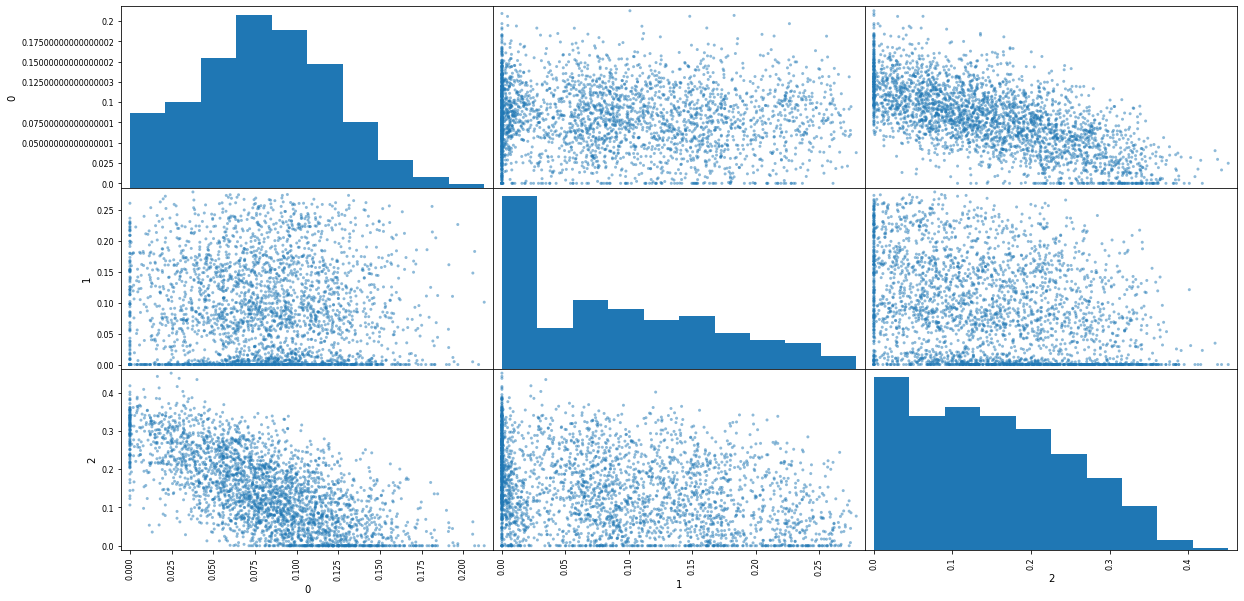

In [40]:
# TO DO: Apply PCA by fitting the good data with only three dimensions
# Instantiate
nmf = NMF(n_components=3,max_iter=2000)
nmf.fit(join_df)

# TO DO: Transform the good data using the PCA fit above
reduced_data = nmf.transform(join_df)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

In [41]:
#Import KMeans and silhouette_score from sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [42]:
# Create range of clusters 
range_n_clusters = list(range(2, 8))
print(range_n_clusters)

# Loop through clusters
for n_clusters in range_n_clusters:
    # TO DO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = n_clusters).fit(reduced_data)

    # TO DO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TO DO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TO DO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

[2, 3, 4, 5, 6, 7]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2. The average silhouette_score is : 0.38787204263554054)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3. The average silhouette_score is : 0.3586845600031908)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4. The average silhouette_score is : 0.3599307938432487)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5. The average silhouette_score is : 0.3418395953510337)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6. The average silhouette_score is : 0.33259776231158483)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7. The average silhouette_score is : 0.3091749654950614)


5 clusters has the best silhouette score of 0.34 if choosing segments between 5 to 7.

In [43]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, reduced_data], axis = 1)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
#Plot the scatter plot using 3d scatter plot from plotly to visualise the clusters
plot_data = plot_data.rename(columns={0: 'Dimension 1', 1: 'Dimension 2', 2: 'Dimension 3'})

In [45]:
import plotly.express as px

fig = px.scatter_3d(plot_data, x='Dimension 1', y='Dimension 2', z='Dimension 3',
              color='Cluster',size_max=0.1,color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [46]:
# TO DO: Inverse transform the centres
pca_centres = nmf.inverse_transform(centres)

true_centres = scaler.inverse_transform(pca_centres)
true_centres = transformer.inverse_transform(true_centres)
#-- Display the true centres
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame(true_centres, columns = join_df.columns)
true_centres.index = segments
print(true_centres)

           total_quantity  total_spend   frequency  avg_quantity_per_visit  \
Segment 0      622.625026   685.244999   56.386627                8.366925   
Segment 1      485.223960   558.588430   38.339737               10.969054   
Segment 2      704.106922  1030.695410  103.387939                6.401342   
Segment 3      388.719700   626.514848   55.123044                7.354898   
Segment 4      282.570549   383.699710   23.407686               11.593215   

           avg_spend_per_visit  avg_spend_per_item    recency  SPEND_BAKERY  \
Segment 0             9.603540            1.021588   1.437233     39.022061   
Segment 1            13.034483            1.121859   3.229529     28.671870   
Segment 2             9.485763            1.406516   1.434182     40.504855   
Segment 3            11.952741            1.590609   4.381129     20.433079   
Segment 4            16.045164            1.334691  12.027456     14.900866   

           SPEND_CASHPOINT  SPEND_CONFECTIONARY  ...  \


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



In [47]:
#Download the true_centres as a csv file.
true_centres.to_csv('true_centres.csv')

In [48]:
#-- Join the segment assignments to the original data 
final_assigments = pd.concat([assignments, df_merged], axis = 1)

#-- Create a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):
    #Download description of each segment as a csv file.
    d.drop(columns='customer_number').describe().to_csv('Segment_' + str(c+1) + '.csv', index=False, header=True)
    print("Segment", c+1)
    display(d.describe())

Segment 1


,Cluster,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,641.0,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,...,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,0.0,7232.330733,729.533541,820.014758,79.889236,10.645352,12.174803,1.144429,1.443058,50.912699,...,72.723136,7.859438,67.798814,22.545179,3.340140,41.438409,7.384462,25.860515,42.229984,11.546771
std,0.0,4717.150123,409.024975,490.564172,41.034611,7.289236,9.336469,0.299838,0.800558,42.886217,...,74.467334,48.662486,78.478405,29.663665,5.658865,40.997605,13.275102,34.543099,141.459009,16.446097
min,0.0,52.000000,93.000000,109.870000,12.000000,1.694064,2.070718,0.568616,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2925.000000,442.000000,474.880000,49.000000,6.392157,6.771284,0.958906,1.000000,24.490000,...,24.430000,0.000000,16.450000,3.440000,0.000000,12.500000,0.000000,5.530000,0.000000,2.050000
50%,0.0,7405.000000,635.000000,702.470000,72.000000,8.708333,9.712353,1.092493,1.000000,40.070000,...,49.860000,0.000000,43.640000,12.100000,1.520000,30.170000,2.920000,13.920000,0.000000,6.000000
75%,0.0,11164.000000,907.000000,1013.380000,102.000000,12.311111,14.168600,1.258123,2.000000,66.030000,...,94.870000,1.000000,91.900000,30.950000,4.240000,56.270000,9.200000,32.640000,6.810000,14.640000
max,0.0,16316.000000,2873.000000,3676.460000,266.000000,60.391304,77.796087,2.930972,7.000000,444.370000,...,509.930000,921.000000,674.850000,249.700000,65.060000,270.910000,157.100000,379.950000,1305.200000,172.620000


Segment 2


,Cluster,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,713.0,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,...,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,1.0,7511.047686,572.542777,694.136886,47.593268,14.173812,17.123097,1.223272,4.187938,38.251879,...,67.449257,1.871669,61.686059,12.047910,2.294698,39.299439,6.072833,21.460926,24.184236,8.151655
std,0.0,5117.609153,347.287258,457.310085,24.911812,10.596589,13.453039,0.312928,3.807299,32.277963,...,75.313615,12.169335,71.247230,21.730148,4.803787,46.013210,13.718593,34.242619,92.227088,11.346039
min,1.0,14.000000,6.000000,7.280000,4.000000,1.200000,1.456000,0.596139,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2511.000000,347.000000,398.670000,29.000000,7.475610,9.005750,1.041874,2.000000,17.420000,...,22.340000,0.000000,18.210000,1.200000,0.000000,10.420000,0.000000,3.670000,0.000000,0.980000
50%,1.0,7494.000000,493.000000,574.390000,42.000000,11.060000,13.247917,1.183531,3.000000,30.000000,...,44.690000,0.000000,42.610000,5.970000,0.000000,26.220000,2.110000,11.700000,0.000000,3.820000
75%,1.0,12401.000000,711.000000,849.040000,59.000000,17.088889,20.169211,1.347880,5.000000,49.320000,...,82.670000,0.000000,79.170000,14.980000,2.550000,52.610000,6.760000,27.650000,0.000000,10.630000
max,1.0,16301.000000,3499.000000,4448.190000,169.000000,90.750000,122.163333,3.514766,37.000000,231.960000,...,655.760000,201.000000,713.280000,351.730000,47.540000,454.290000,209.930000,529.650000,810.670000,91.020000


Segment 3


,Cluster,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,584.0,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2.0,8279.671233,801.376712,1177.600805,112.582192,7.639560,11.312195,1.543002,1.515411,50.321747,...,75.493579,56.730839,62.017860,30.058271,2.375223,42.119366,8.021490,35.639743,236.027928,11.504041
std,0.0,3873.850738,499.862017,733.053397,59.187727,3.903614,5.992198,0.563350,1.060649,42.403545,...,84.043072,100.953093,76.365235,35.474257,4.154945,48.335672,16.099411,46.977816,304.371866,21.995410
min,2.0,170.000000,40.000000,51.480000,15.000000,1.428571,2.556300,0.684275,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,5010.500000,478.000000,661.940000,72.000000,5.101679,7.077144,1.169042,1.000000,21.722500,...,23.122500,3.000000,15.412500,6.750000,0.000000,12.220000,0.000000,6.157500,12.420000,1.732500
50%,2.0,8836.500000,699.500000,983.465000,100.500000,6.854422,10.213521,1.403003,1.000000,40.865000,...,52.440000,18.500000,37.760000,17.795000,0.105000,27.250000,3.380000,19.795000,127.395000,5.920000
75%,2.0,11079.750000,965.250000,1482.150000,143.000000,9.044028,14.051060,1.797956,2.000000,66.070000,...,96.135000,63.625000,82.720000,41.535000,3.400000,55.017500,9.640000,45.672500,343.457500,13.627500
max,2.0,16295.000000,4949.000000,6588.650000,374.000000,30.716667,46.366250,4.982759,12.000000,430.500000,...,884.450000,881.550000,707.250000,265.100000,38.940000,372.360000,229.440000,378.160000,2488.940000,321.490000


Segment 4


,Cluster,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.0,8916.944664,442.243083,713.566482,57.950593,8.629332,14.091720,1.785281,9.841897,28.639585,...,43.692470,24.293478,38.228478,12.678597,0.976581,26.339802,4.706245,18.282372,156.069605,6.422154
std,0.0,4253.874336,275.089073,427.159784,31.601033,6.179383,9.900045,0.766388,16.591144,28.296631,...,50.205353,64.429110,50.106194,19.017111,2.454233,29.833890,10.255263,26.567566,213.993978,10.209860
min,3.0,258.000000,31.000000,77.630000,7.000000,1.370968,2.773214,0.558163,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,5514.750000,242.250000,420.287500,35.000000,5.002294,8.453281,1.277053,3.000000,10.835000,...,10.647500,0.000000,5.902500,1.300000,0.000000,6.655000,0.000000,3.065000,13.287500,0.000000
50%,3.0,8872.000000,389.000000,616.570000,52.500000,6.992754,11.812940,1.586587,5.000000,21.995000,...,28.595000,5.000000,21.250000,5.995000,0.000000,16.140000,1.100000,8.700000,69.925000,2.785000
75%,3.0,12611.250000,583.750000,891.300000,76.750000,10.363704,16.613643,2.015855,8.000000,38.527500,...,60.930000,20.000000,53.080000,16.350000,0.000000,35.780000,4.877500,23.150000,215.242500,8.442500
max,3.0,16303.000000,1729.000000,2801.320000,268.000000,83.833333,152.621667,7.183217,139.000000,335.010000,...,507.590000,946.000000,410.440000,170.130000,18.430000,206.800000,106.460000,195.240000,1272.290000,117.630000


Segment 5


,Cluster,customer_number,total_quantity,total_spend,frequency,avg_quantity_per_visit,avg_spend_per_visit,avg_spend_per_item,recency,SPEND_BAKERY,...,SPEND_GROCERY_HEALTH_PETS,SPEND_LOTTERY,SPEND_MEAT,SPEND_NEWSPAPERS_MAGAZINES,SPEND_PRACTICAL_ITEMS,SPEND_PREPARED_MEALS,SPEND_SEASONAL_GIFTING,SPEND_SOFT_DRINKS,SPEND_TOBACCO,SPEND_WORLD_FOODS
count,556.0,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,...,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000
mean,4.0,8900.305755,333.634892,448.062446,27.577338,14.542427,19.408062,1.414853,31.627698,19.500378,...,39.294371,1.395683,38.166942,5.304227,0.701853,25.060324,4.049784,14.393327,29.709586,4.462590
std,0.0,4958.078497,232.479982,319.122269,19.275512,9.768353,12.851343,0.617716,37.815244,18.645793,...,42.051649,8.523359,44.474627,9.394004,2.413746,31.317947,10.174873,27.917406,92.984757,7.492002
min,4.0,81.000000,27.000000,30.230000,1.000000,1.875000,3.621875,0.639379,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4241.000000,163.000000,215.395000,14.000000,7.681550,10.773697,1.108024,8.000000,6.512500,...,10.910000,0.000000,8.862500,0.000000,0.000000,5.605000,0.000000,2.160000,0.000000,0.000000
50%,4.0,9701.500000,268.500000,380.090000,24.000000,11.913399,15.466636,1.276539,14.000000,13.840000,...,25.935000,0.000000,22.580000,2.000000,0.000000,16.090000,0.840000,6.865000,0.000000,1.640000
75%,4.0,13040.500000,444.000000,600.760000,35.250000,17.850000,24.446334,1.537607,39.000000,27.165000,...,52.202500,0.000000,51.067500,6.525000,0.000000,32.082500,3.820000,17.245000,9.145000,5.912500
max,4.0,16306.000000,1441.000000,2407.450000,129.000000,60.041667,73.750000,7.919243,165.000000,149.370000,...,321.360000,152.000000,317.540000,84.690000,24.800000,234.630000,116.680000,445.950000,765.920000,62.700000


In [49]:
#Finally download assignments of customer ID's to clusters as a csv file
final_assigments[['customer_number','Cluster']].to_csv('cluster_assignments.csv', index=False, header=True)